<h1>Activity 3 - Philippines Dengue Data Analytics Projects</h1>

<hr>

<h3>Analyst: Edwin Viñas</h3>

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h3>Converting Datasets into DataFrame</h3>

In [115]:
df = pd.read_csv('datasets\\dengue.csv')
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [117]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [118]:
df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [119]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [120]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

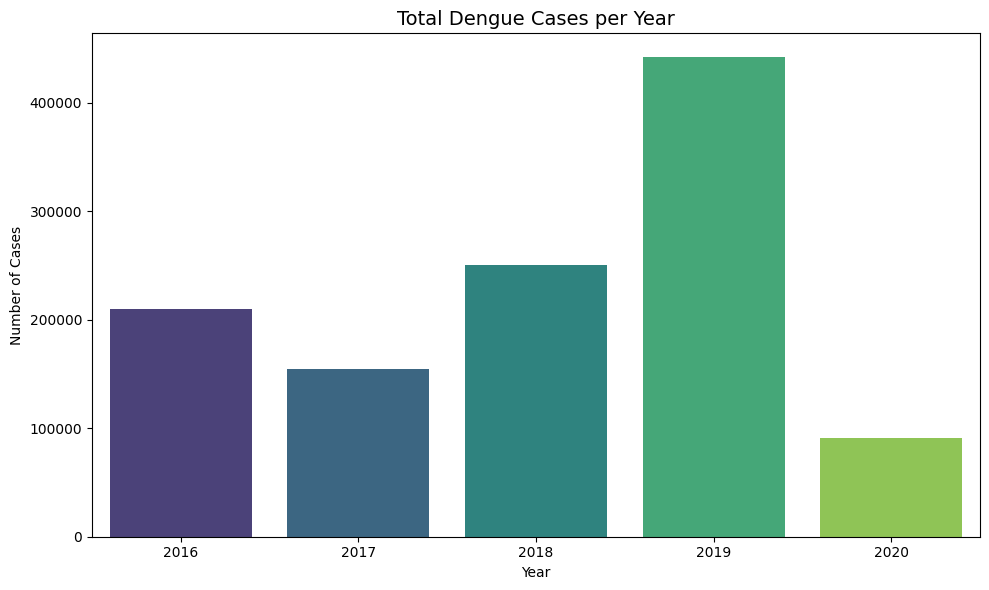

In [121]:
plt.figure(figsize=(10,6))
yearly_cases = df.groupby('Year')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=yearly_cases, x='Year', y='Dengue_Cases', palette='viridis')
plt.title('Total Dengue Cases per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

<h3> Isights 1: This graph shows how dengue cases change every year,
and we can see which years had the highest outbreaks and when cases went down. </h3>

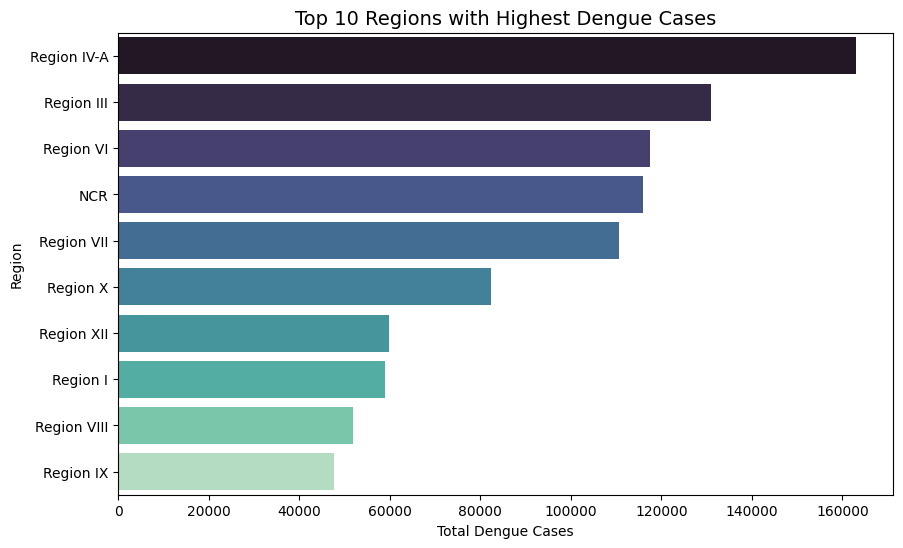

In [122]:
plt.figure(figsize=(10,6))
province_cases = df.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values('Dengue_Cases', ascending=False).head(10)
sns.barplot(data=province_cases, x='Dengue_Cases', y='Region', palette='mako')
plt.title('Top 10 Regions with Highest Dengue Cases', fontsize=14)
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.show()


<h3> Isights 2: This shows the top region that reported the most dengue cases it helps identify which areas need more health programs and awareness. </h3>

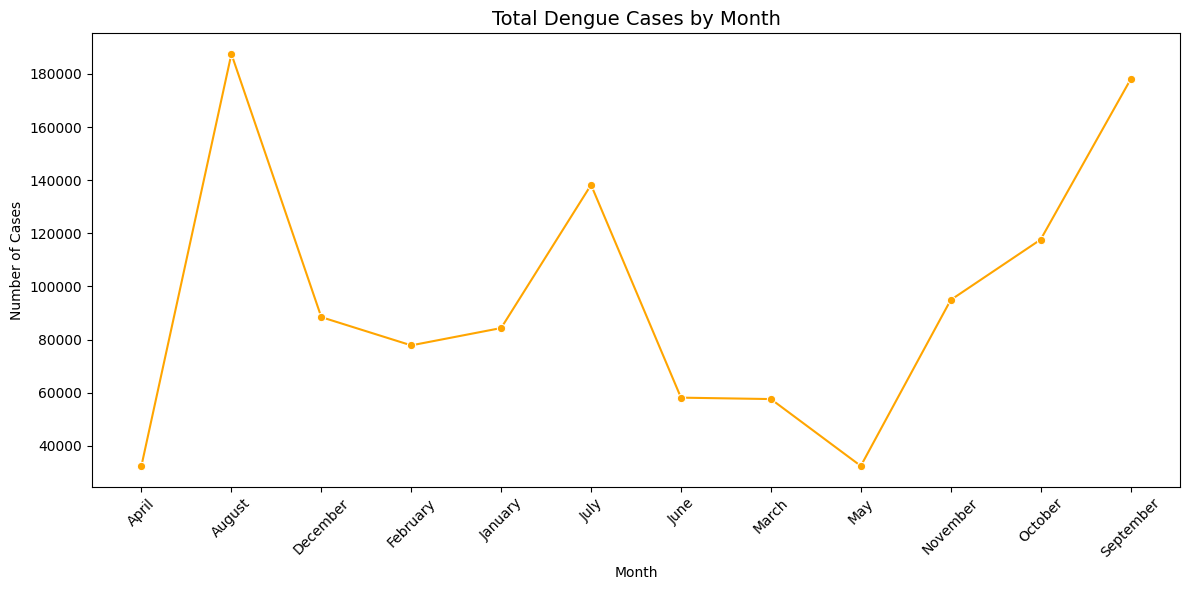

In [123]:
plt.figure(figsize=(12,6))
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum().reset_index()
sns.lineplot(data=monthly_cases, x='Month', y='Dengue_Cases', marker='o', color='orange')
plt.title('Total Dengue Cases by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3> Isights 3: This shows which months have the most dengue cases, cases usually rise during the rainy months when mosquitoes breed more easily.</h3>

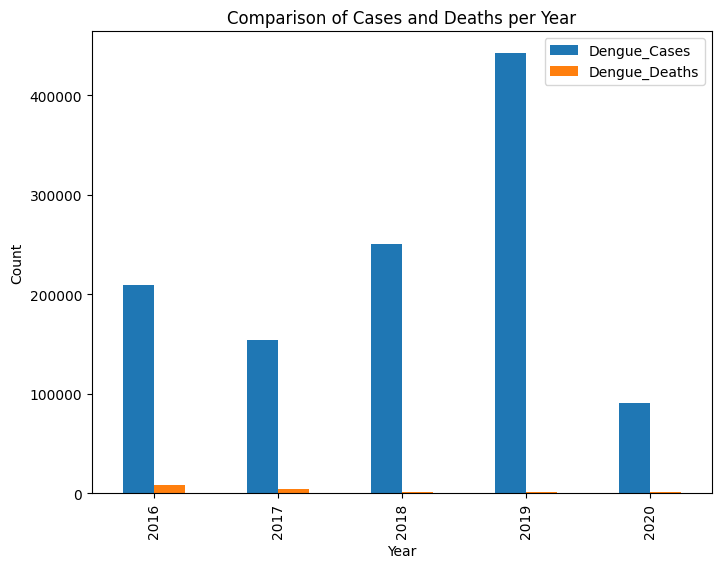

In [124]:
yearly_summary = df.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()
yearly_summary.plot(x='Year', y=['Dengue_Cases','Dengue_Deaths'], kind='bar', figsize=(8,6))
plt.title('Comparison of Cases and Deaths per Year')
plt.ylabel('Count')
plt.show()

<h3> Isights 4: This compares total dengue cases and deaths yearly, A big gap means better recovery rates smaller gaps could mean more severe infections.
 </h3>

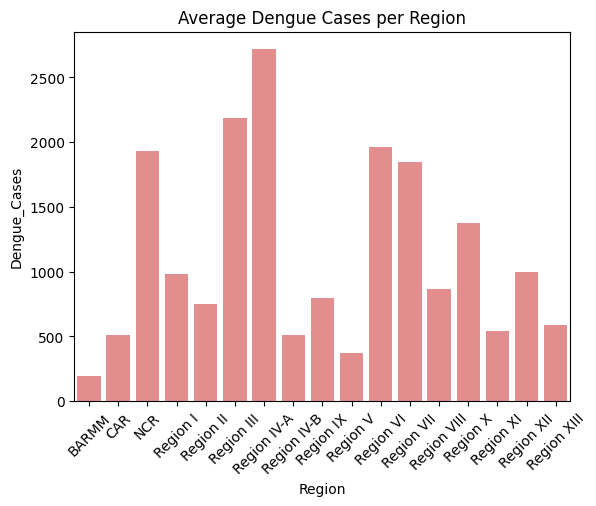

In [125]:
avg_cases = df.groupby(['Region'])['Dengue_Cases'].mean().reset_index()
sns.barplot(data=avg_cases, x='Region', y='Dengue_Cases', color='lightcoral')
plt.title('Average Dengue Cases per Region')
plt.xticks(rotation=45)
plt.show()

<h3> Isights 5: This shows the average dengue cases per region, Regions with consistently high averages may have long-term mosquito control issues.</h3>

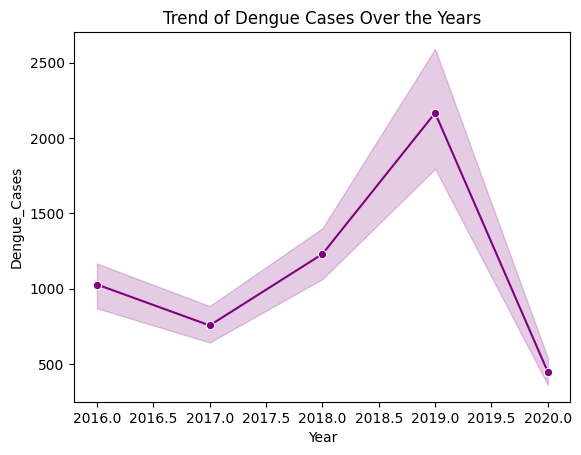

In [126]:
sns.lineplot(data=df, x='Year', y='Dengue_Cases', marker='o', color='purple')
plt.title('Trend of Dengue Cases Over the Years')
plt.show()

<h3> Isights 6: This line shows the trend of dengue cases through the years, It helps identify if dengue is increasing or decreasing over time. </h3>

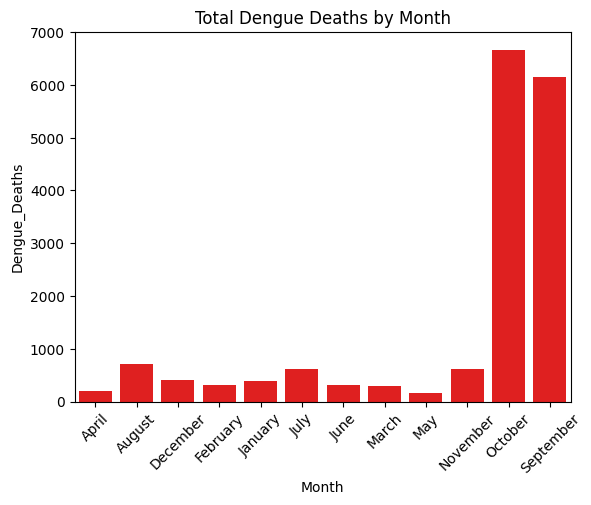

In [127]:
month_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=month_deaths, x='Month', y='Dengue_Deaths', color='red')
plt.title('Total Dengue Deaths by Month')
plt.xticks(rotation=45)
plt.show()

<h3> Isights 7: This shows the months with the highest dengue deaths, If this aligns with rainy season peaks, health agencies can target those months for campaigns. </h3>

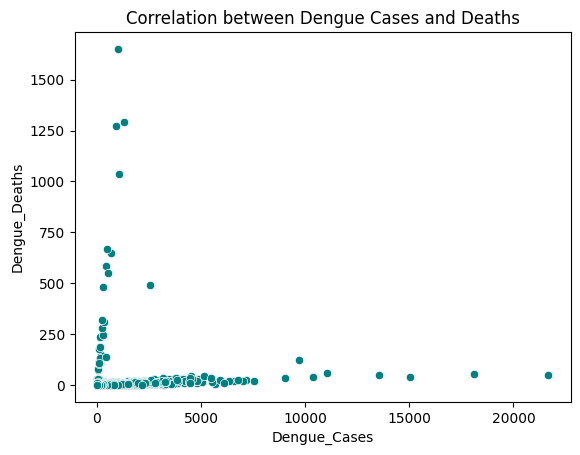

In [128]:
sns.scatterplot(data=df, x='Dengue_Cases', y='Dengue_Deaths', color='teal')
plt.title('Correlation between Dengue Cases and Deaths')
plt.show()


<h3> Isights 8: This shows if higher dengue cases also lead to more deaths, A positive trend means cases and deaths often rise together. </h3>

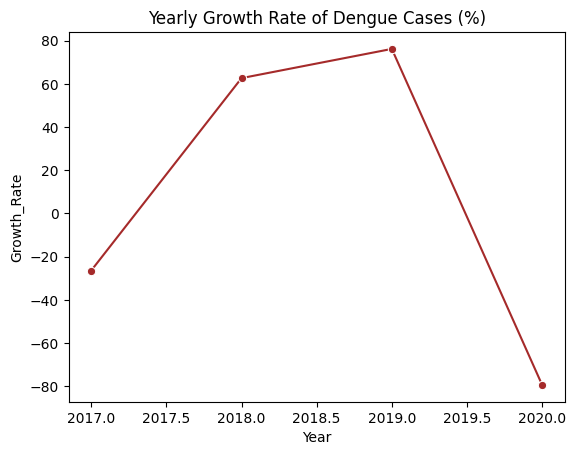

In [129]:
yearly_cases['Growth_Rate'] = yearly_cases['Dengue_Cases'].pct_change() * 100
sns.lineplot(data=yearly_cases, x='Year', y='Growth_Rate', marker='o', color='brown')
plt.title('Yearly Growth Rate of Dengue Cases (%)')
plt.show()


<h3> Isights 9: This shows how fast dengue cases increased or decreased each year, Sharp increases indicate outbreak years or improved reporting.
</h3>

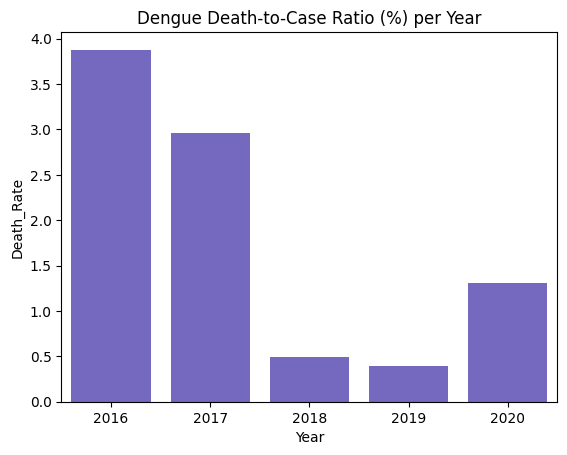

In [130]:
yearly_summary['Death_Rate'] = (yearly_summary['Dengue_Deaths'] / yearly_summary['Dengue_Cases']) * 100
sns.barplot(data=yearly_summary, x='Year', y='Death_Rate', color='slateblue')
plt.title('Dengue Death-to-Case Ratio (%) per Year')
plt.show()

<h3> Isights 10: This shows the percentage of dengue cases that resulted in death each year. A lower rate indicates better medical response or milder outbreaks. </h3>